# Chapter 3: Classification

# Getting Started

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
df, target = mnist["data"], mnist["target"]

In [3]:
df.shape

(70000, 784)

In [4]:
target.shape

(70000,)

## Split Train Test

In [5]:
train_df, test_df, train_target, test_target = df[:60000], df[60000:], target[:60000], target[60000:]

In [6]:
import numpy as np
shuffle_index = np.random.permutation(60000)
train_df, train_target = train_df.iloc[shuffle_index], train_target.iloc[shuffle_index]

# Explore Data

6


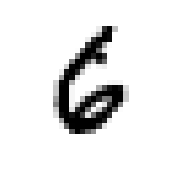

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = train_df.iloc[0].values
roll = train_target.iloc[0]
print(roll)
plt.figure(figsize=(2,2))
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Clean Data

In [8]:
import numpy as np
train_target = train_target.astype(np.uint8)
test_target = test_target.astype(np.uint8)

# Machine Learning

## Training a Binary Classifier

In [45]:
train_roll = (train_target==roll)
test_roll = (test_target==roll)

In [46]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_df, train_roll)

SGDClassifier(random_state=42)

In [47]:
sgd_clf.predict([some_digit])

array([ True])

## Why Accuracy Sucks

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_df, train_9, cv=3, scoring="accuracy")


array([0.9561 , 0.96735, 0.96765])

Very High Accuracy Results. You got sgd_clf, which was fitted with TRAIN dataset and evaluated the number of times it is correct using K-fold evaluation. You get high results because majority of the values are not 9, so you would be correct 90% of the time that the value is not 9.

In [49]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [50]:
never_roll_clf = Never5Classifier()
cross_val_score(never_roll_clf, train_df, train_roll, cv=3, scoring="accuracy")

array([0.9009, 0.9041, 0.8991])

Accuracy is generally not a good measure of performance for classifiers. About 10% of the images are 5s, so if you always guess that an image is not a 5, then you will be right 90% of the time.

## Confusion Matrix
This counts the numner of times the instances of class A are classified as class B. 

In [51]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_df, train_roll, cv=3)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_roll, y_train_pred)

array([[53357,   725],
       [  539,  5379]], dtype=int64)

In [53]:
y_train_pred_perfect = train_roll
confusion_matrix(train_roll, y_train_pred_perfect)

array([[54082,     0],
       [    0,  5918]], dtype=int64)

In [59]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(train_roll, y_train_pred)
precision

0.8812254259501966

In [60]:
recall = recall_score(train_roll, y_train_pred)
recall

0.9089219330855018

### F1 score
Harmonic mean gives more weigh to low values. Regular mean will weight the 2 values equal.

In [65]:
from sklearn.metrics import f1_score
print('mean: ', (precision + .001) / 2)
print('f1: ', f1_score(train_roll, y_train_pred))

mean:  0.4411127129750983
f1:  0.8948594243886209


### Threshold

In [57]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([5121.19071847])

In [58]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])